In [2]:
import numpy as np
import math
import toolbox_extended as te

from IPython.display import Image, display

In [23]:
class decision_trees:
    def entropy(self, v):
        v = np.array(v)
        l2 = [math.log2(v[i] / sum(v)) for i in range(len(v))]
        l2 = np.array(l2)

        return 1 - np.sum(((v / sum(v)) * l2))

    def purity_gain(self, root, v1, v2, purity_measure, accuracy=False):
        """
        root = list with the size of each class
        v1 = list with the size of each class in the first branch after the split
        v2 = list with the size of each class in the second branch after the split
        purity_measure = string with the purity measure to use
            gini, class_error, or entropy
        """
        root = np.array(root)
        v1 = np.array(v1)
        v2 = np.array(v2)

        v = np.array([v1, v2])

        acc = (np.max(v1) + np.max(v2)) / np.sum(v)
        if accuracy:
            print("The accuracy of the split is {}".format(acc))

        Iv = 0

        if purity_measure == "gini":
            for i in range(2):
                Iv += te.gini(v[i]) * sum(v[i]) / sum(root)

            purity = te.gini(root) - Iv

        if purity_measure == "class_error":
            for i in range(2):
                Iv += te.class_error(v[i]) * sum(v[i]) / sum(root)

            purity = te.class_error(root) - Iv

        if purity_measure == "entropy":
            for i in range(2):
                Iv += self.entropy(v[i]) * sum(v[i]) / sum(root)

            purity = te.class_error(root) - Iv

        print(
            "The purity gain for the split is {} with the purity measure {}".format(
                purity, purity_measure
            )
        )
        return purity

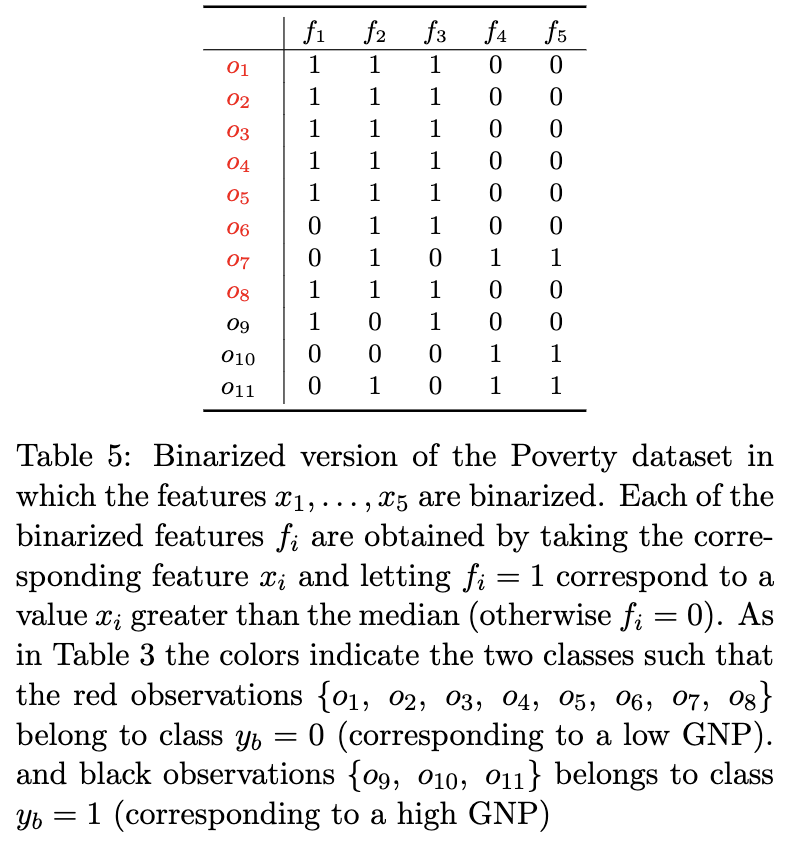

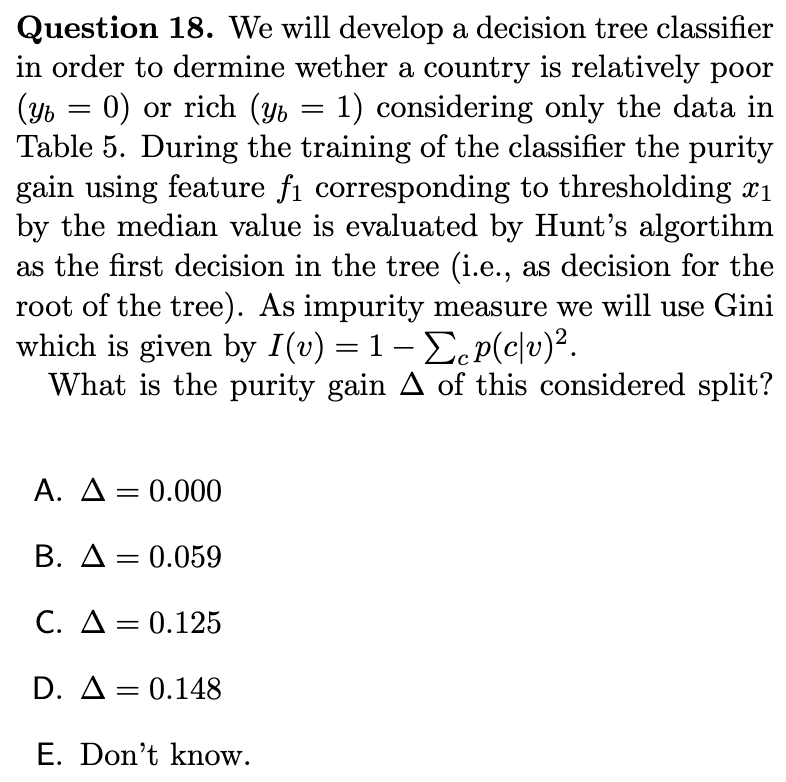

In [4]:
display(Image(filename='figures/purity_gain3.png', width=500))
display(Image(filename='figures/purity_gain2.png', width=500))

In [22]:
dec = decision_trees()
# We see the median of f1 is 1
# This will put 6 red & 1 black in one branch
# and 2 red and 2 black in the other
dec.purity_gain([8,3],[6,1],[2,2],"gini")
# We see that the purity gain is 0.059, answer B

The purity gain for the split is 0.059031877213695405 with the purity measure gini


0.059031877213695405

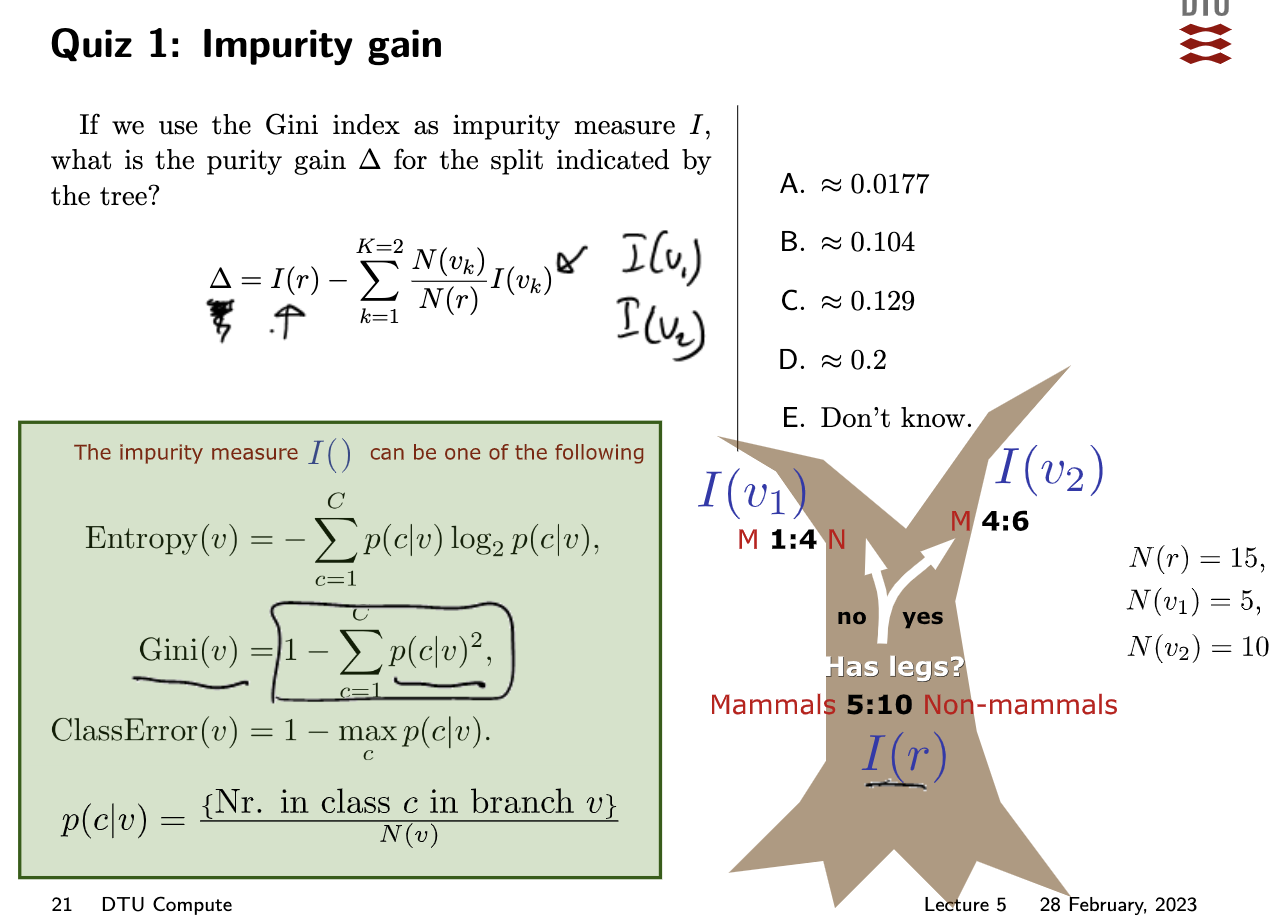

In [17]:
display(Image(filename='figures/purity_gain.png', width=600))

In [24]:
dec = decision_trees()
dec.purity_gain([5,10],[1,4],[4,6],"gini")

The purity gain for the split is 0.01777777777777778 with the purity measure gini


0.01777777777777778